## Reading of gridded data - the *ReadGridded* class

This notebook introduces the [ReadGridded](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.io.readgridded.ReadGridded) class of pyaerocom, a flexible interface for importing model results from a single model, based on variable name (e.g. *od550aer*, *od550bc*), start / stop time stamps and temporal resolution (e.g. *hourly, 3hourly, daily, monthly*). 

The class is part of the [readgridded](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.io.readgridded) module of pyaerocom.

In the following, we create an instance of the the `ReadGridded` class and use this object to find and import data 
files containing the aerosol optical depth at 550 nm (*od550aer*) from the ECMWF CAMS reanalysis dataset (*ECMWF_CAMS_REAN*) for the years 2003-2007 and in daily resolution. The files will be temporally merged and put into a single instance of the `GriddedData` class. 

We start with creating a reading object, that will take care of finding the model directory for us (based on the model ID) and all valid NetCDF files on initialisation. Use the `print` commant to preview the string representation of `ReadGridded` object, which provides useful information about what is in there.

### Remark on reading of gridded data

Since model data files can be large (too large for in-memory operations), gridded data in pyaerocom (e.g. model data or satellite data) is generally read and represented as *lazy data*. That means, that the actual N-dimensional data array is not loaded into memory before needed. Lazy data is represented as [dask array] as pyaerocom data objects rely either on the Python [iris](https://scitools.org.uk/iris/docs/latest/index.html) library or [xarray](http://xarray.pydata.org/en/stable/index.html) (which both use dask for representing lazy data and for out of core computation). For more information on lazy data, see e.g. https://scitools.org.uk/iris/docs/latest/userguide/real_and_lazy_data.html.

**Example**: Consider one year of daily model data in 1x1 resolution with 30 vertical layers, stored as 64 bit floating point numbers. Loading such a file into memory, would require a RAM of at least:

In [1]:
'{:.1f} GB'.format(64 * (360 * 180) * 30 * 365 / (8 * 10**9))

'5.7 GB'

Or the same in hourly resolution:

In [2]:
'{:.1f} GB'.format(64 * (360 * 180) * 30 * 365 * 24 / (8 * 10**9))

'136.2 GB'

In [3]:
import pyaerocom as pya
pya.change_verbosity('critical')

Initating pyaerocom configuration


Checking database access...


Checking access to: /lustre/storeA


Access to lustre database: True


Init data paths for lustre


Expired time: 0.022 s


### Create instance of `ReadGridded` class

In [4]:
reader = pya.io.ReadGridded(data_id="ECMWF_CAMS_REAN")
print(reader)


Pyaerocom ReadGridded
---------------------
Data ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available experiments: ['', 'REAN']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 9999]
Available frequencies ['daily' 'monthly']
Available variables: ['ang4487aer', 'bscatc532aerboa', 'bscatc532aertoa', 'ec532aer', 'ec532dryaer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer', 'sconcbc', 'sconcdust', 'sconcoa', 'sconcpm10', 'sconcpm25', 'sconcso4', 'sconcss', 'time', 'z']


The output contains information about all variables that were found and all corresponding years. These information is extracted from the filenames, which have to follow the AEROCOM file naming conventions.

**Please note** that at this point, no data is actually imported but only the paths are set that contain data for this model. In order to read one variable, call the ``read_var`` function with a valid variable name. You can check available variables using the ``vars`` attribute (or by printing the string representation, as shown in the cell above).

In [5]:
reader.vars

['ang4487aer',
 'bscatc532aerboa',
 'bscatc532aertoa',
 'ec532aer',
 'ec532dryaer',
 'od440aer',
 'od550aer',
 'od550bc',
 'od550dust',
 'od550oa',
 'od550so4',
 'od550ss',
 'od865aer',
 'sconcbc',
 'sconcdust',
 'sconcoa',
 'sconcpm10',
 'sconcpm25',
 'sconcso4',
 'sconcss',
 'time',
 'z']

In [6]:
data = reader.read_var(var_name="od550aer", ts_type="daily", start="1-1-2003", stop="31-12-2007")
data

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 1826; latitude: 161; longitude: 320)>

The returned data object is of type [GriddedData](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.griddeddata.GriddedData) class, which will be introduced in more detail later. This data object is returned by the ``read_var`` method and can also be accessed from the instance of the reading class using:

In [7]:
d = reader.data["od550aer"]
d is data #?

True

We may also import other variables using either the above used method ``read_var`` or the more general ``read`` method which can read single or multiple variables on the run.

In [8]:
reader.read(['od550bc', 'od550dust', 'od550oa', 'od550so4'])

ECMWF_CAMS_REAN.daily.od550bc.2019.nc


ECMWF_CAMS_REAN.daily.od550dust.2019.nc


ECMWF_CAMS_REAN.daily.od550oa.2019.nc


ECMWF_CAMS_REAN.daily.od550so4.2019.nc


(pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 6209; latitude: 161; longitude: 320)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 6209; latitude: 161; longitude: 320)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 6209; latitude: 161; longitude: 320)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 6209; latitude: 161; longitude: 320)>)

Now let's double check if all variables have been imported.

In [9]:
print(reader)


Pyaerocom ReadGridded
---------------------
Data ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available experiments: ['', 'REAN']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 9999]
Available frequencies ['daily' 'monthly']
Available variables: ['ang4487aer', 'bscatc532aerboa', 'bscatc532aertoa', 'ec532aer', 'ec532dryaer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer', 'sconcbc', 'sconcdust', 'sconcoa', 'sconcpm10', 'sconcpm25', 'sconcso4', 'sconcss', 'time', 'z']

Loaded GriddedData objects:
ID: ECMWF_CAMS_REAN, Var: od550aer
ID: ECMWF_CAMS_REAN, Var: od550bc
ID: ECMWF_CAMS_REAN, Var: od550dust
ID: ECMWF_CAMS_REAN, Var: od550oa
ID: ECMWF_CAMS_REAN, Var: od550so4


In the following we continue with the ``od550aer`` data object that was loaded first and that was assigned the name ``data`` above. 

In [10]:
print("\nThe data object is of type %s and contains %d time stamps" %(type(data), data.shape[0]))


The data object is of type <class 'pyaerocom.griddeddata.GriddedData'> and contains 1826 time stamps


The returned [GriddedData](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.griddeddata.GriddedData) object contains 1826 time stamps. Given that the defined period of 5 years includes one leap year, we should expect that we imported data for each day of the five years?

In [11]:
print(1826 == 5*365+1)

True


#### Other options for reading

The reading query can be further customised with respect to the temporal resolution that is requested. Let's have a look at the available AOD data at 550 nm:

In [12]:
reader.filter_files(var_name='od550aer')

,var_name,year,ts_type,vert_code,data_id,name,meteo,experiment,is_at_stations,3D,filename
15,od550aer,2003,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2003.nc
144,od550aer,2003,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2003.nc
85,od550aer,2004,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2004.nc
110,od550aer,2004,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2004.nc
236,od550aer,2005,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2005.nc
82,od550aer,2005,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2005.nc
215,od550aer,2006,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2006.nc
179,od550aer,2006,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2006.nc
157,od550aer,2007,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2007.nc
0,od550aer,2007,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2007.nc


As you can see, there are both daily and monthly files. The monthly, however only covers the years 2003-2007, while the daily has data until 2018:

In [13]:
reader.filter_files(var_name='od550aer', ts_type='monthly')

,var_name,year,ts_type,vert_code,data_id,name,meteo,experiment,is_at_stations,3D,filename
144,od550aer,2003,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2003.nc
110,od550aer,2004,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2004.nc
82,od550aer,2005,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2005.nc
179,od550aer,2006,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2006.nc
0,od550aer,2007,monthly,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2007.nc


In [14]:
reader.filter_files(var_name='od550aer', ts_type='daily')

,var_name,year,ts_type,vert_code,data_id,name,meteo,experiment,is_at_stations,3D,filename
15,od550aer,2003,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2003.nc
85,od550aer,2004,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2004.nc
236,od550aer,2005,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2005.nc
215,od550aer,2006,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2006.nc
157,od550aer,2007,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2007.nc
191,od550aer,2008,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2008.nc
72,od550aer,2009,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2009.nc
201,od550aer,2010,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2010.nc
14,od550aer,2011,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2011.nc
152,od550aer,2012,daily,,ECMWF_CAMS_REAN,,,REAN,False,False,aerocom.ECMWF_CAMS_REAN.daily.od550aer.2012.nc


Now, when it comes to reading a data object, these information can be specified as input:

In [15]:
aod_monthly = reader.read_var('od550aer', ts_type='monthly')
print(aod_monthly.start, aod_monthly.stop, aod_monthly.ts_type)

2003-01-01T00:00:00.000000 2007-12-31T23:59:59.999999 monthly


In [16]:
aod_daily = reader.read_var('od550aer', ts_type='daily')
print(aod_daily.start, aod_daily.stop, aod_daily.ts_type)

ECMWF_CAMS_REAN.daily.od550aer.2019.nc


2003-01-01T00:00:00.000000 2019-12-31T23:59:59.999999 daily


However, what about a situation where you write a script that processes many models and you don't really know, in what resolution the model data comes, but 1. you prefer monthly where available (keyword `flex_ts_type`), and 2. you want to have the longest available timeseries (keyword `prefer_longer`). 

In [17]:
aod_inferred = reader.read_var('od550aer', ts_type='monthly', flex_ts_type=True, prefer_longer=True)
print(aod_inferred.start, aod_inferred.stop, aod_inferred.ts_type)

ECMWF_CAMS_REAN.daily.od550aer.2019.nc


2003-01-01T00:00:00.000000 2019-12-31T23:59:59.999999 daily


As you can see, the reading routine has automatically identified, that the daily dataset has a better time coverage and has thus, preferred that one over the specified ts_type of monthly.

In [18]:
aod_inferred_monthly = aod_inferred.resample_time('monthly')
aod_inferred_monthly

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 204; latitude: 161; longitude: 320)>

#### Remark on time definition

If the time dimension is not properly defined in a NetCDF data file, Pyaerocom can correct for this on data import by:

1. First checking if the time dimension in the NetCDF file is correct according to CF convention ([see here for details on the implementation](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.io.helpers.check_time_coord) and if a problem is detected, then ...
2. the time axis is redefined based on the year and time resolution (*ts_type*) that is provided in the filename. The latter requires that the file follows one of the [pyaerocom file conventions](http://aerocom.met.no/pyaerocom/config_files.html#file-conventions).

#### A very brief introduction into the GriddedData class

Now as a final step, we briefly introduce some of the features of the `GriddedData` class by computing and plotting a time series of the global weighted average aerosol optical density as well as the same time series at the coordinates in the city of Leipzig, Germany.

In [19]:
#extract AODs at the position of Leipzig
lon_leipzig = 12.44
lat_leipzig = 51.35

# the method to_time_series is designed to handle more than one coordinate (i.e. a list of station coordinates)
data_leipzig = data.to_time_series(latitude=lat_leipzig, longitude=lon_leipzig)[0]

global_mean = data.get_area_weighted_timeseries()
europe_mean = data.get_area_weighted_timeseries(region='EUROPE')
india_mean = data.get_area_weighted_timeseries(region='INDIA')

Interpolating data of shape (1826, 161, 320). This may take a while.


Successfully interpolated cube


#### Plot timeseries 

Trying to infer ts_type in StationData ECMWF_CAMS_REAN for variable od550aer


Trying to infer ts_type in StationData ECMWF_CAMS_REAN for variable od550aer


Trying to infer ts_type in StationData ECMWF_CAMS_REAN for variable od550aer


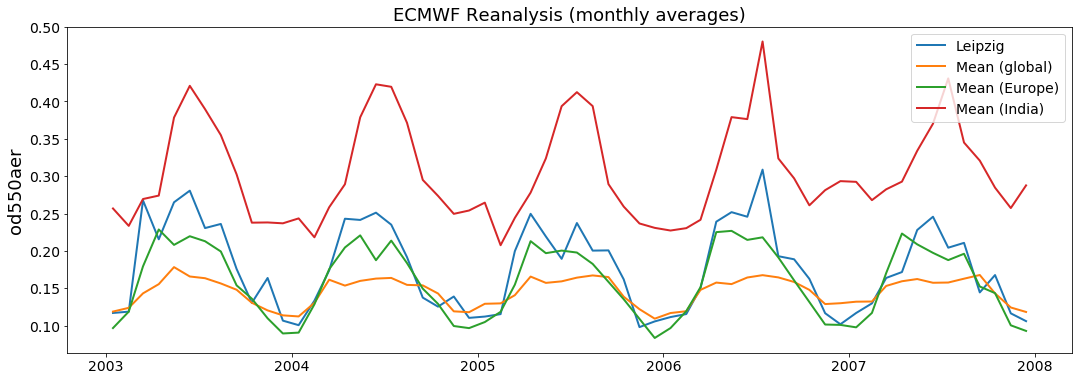

In [20]:
ax =  data_leipzig.plot_timeseries(var_name='od550aer', freq='monthly', lw=2, label='Leipzig', figsize=(18, 6))
global_mean.plot_timeseries(var_name='od550aer', freq='monthly', lw=2, ax=ax, label='Mean (global)')
europe_mean.plot_timeseries(var_name='od550aer', freq='monthly', lw=2, ax=ax, label='Mean (Europe)')
india_mean.plot_timeseries(var_name='od550aer', freq='monthly', lw=2, ax=ax, label='Mean (India)')
ax.legend()
tit = ax.set_title("ECMWF Reanalysis (monthly averages)")